In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    'col1':np.random.normal(0,2,30000),
    'col2':np.random.normal(5,3,30000),
    'col3':np.random.normal(-5,5,30000)
})

In [3]:
df.describe()

,col1,col2,col3
count,30000.000000,30000.000000,30000.000000
mean,0.004818,4.973832,-4.978177
std,1.988014,3.001534,4.999545
min,-8.574647,-7.240237,-29.409973
25%,-1.341093,2.938595,-8.371555
50%,0.008402,4.941928,-4.957862
75%,1.353356,7.008639,-1.639380
max,8.447801,18.983025,16.619829


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# for not warning in the page in jupyter
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [15]:

colnames=df.columns
features = df[colnames]
scaler=StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaledfeatures = pd.DataFrame(features, columns= colnames)
print(scaledfeatures.head())
scaledfeatures.describe()

       col1      col2      col3
0 -1.253923  0.942061 -0.616117
1 -0.074494  1.280933  1.138003
2 -0.458738 -0.193897 -0.982566
3  0.734399  0.850827  0.575340
4 -0.171962  0.205360  2.611576


,col1,col2,col3
count,3.000000e+04,3.000000e+04,3.000000e+04
mean,-1.509163e-17,-9.729810e-17,1.345516e-16
std,1.000017e+00,1.000017e+00,1.000017e+00
min,-4.315668e+00,-4.069343e+00,-4.886885e+00
25%,-6.770240e-01,-6.780770e-01,-6.787486e-01
50%,1.802790e-03,-1.062938e-02,4.063529e-03
75%,6.783456e-01,6.779335e-01,6.678313e-01
max,4.247014e+00,4.667422e+00,4.320066e+00


In [15]:
#note that sstd is one

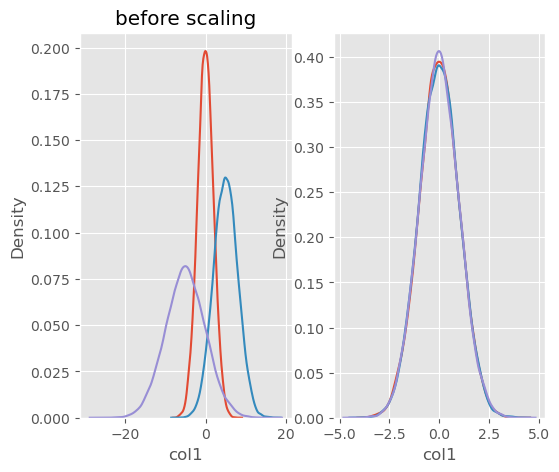

In [20]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('before scaling')
sns.kdeplot(df['col1'],ax=ax1)
sns.kdeplot(df['col2'],ax=ax1)
sns.kdeplot(df['col3'],ax=ax1)
sns.kdeplot(scaledfeatures['col1'],ax=ax2)
sns.kdeplot(scaledfeatures['col2'],ax=ax2)
sns.kdeplot(scaledfeatures['col3'],ax=ax2)
plt.show()

# min max scaler

In [40]:
df1 = pd.DataFrame({
    'col1':np.random.chisquare(8,1000),
    'col2':np.random.beta(8,2,1000)*40,
    'col3':np.random.normal(50,3,1000)
})
df1

,col1,col2,col3
0,3.588933,38.704618,46.010635
1,12.481120,20.537960,52.254056
2,14.443210,34.503317,51.439835
3,3.901665,30.878136,51.505832
4,6.157119,33.888429,48.447555
...,...,...,...
995,21.613363,31.754078,51.743236
996,15.462948,33.262706,50.007092
997,9.076580,27.926715,50.502523
998,3.469415,27.877640,45.713239


In [41]:
#std scale
colnames=df1.columns
features = df1[colnames]
scaler=StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaledfeatures = pd.DataFrame(features, columns= colnames)
scaledfeatures.head()
scaledfeatures.describe()

,col1,col2,col3
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-6.816769e-17,2.131628e-16,-8.459899e-17
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.836543e+00,-5.311930e+00,-3.015676e+00
25%,-7.393978e-01,-5.900687e-01,-6.942094e-01
50%,-1.577868e-01,1.426621e-01,-2.959172e-02
75%,5.457009e-01,7.623238e-01,6.383473e-01
max,4.831363e+00,1.637003e+00,3.840011e+00


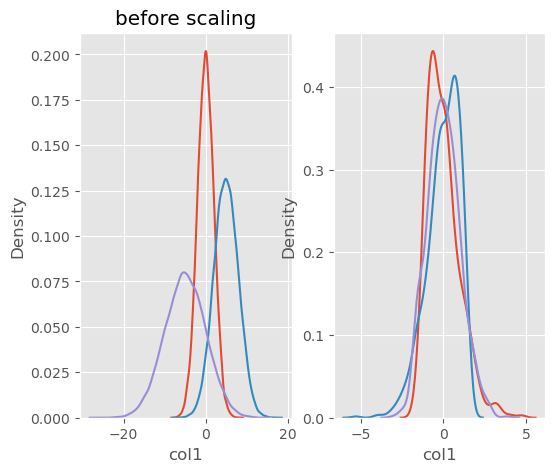

In [42]:
#std scale
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('before scaling')
sns.kdeplot(df['col1'],ax=ax1)
sns.kdeplot(df['col2'],ax=ax1)
sns.kdeplot(df['col3'],ax=ax1)
sns.kdeplot(scaledfeatures['col1'],ax=ax2)
sns.kdeplot(scaledfeatures['col2'],ax=ax2)
sns.kdeplot(scaledfeatures['col3'],ax=ax2)
plt.show()

In [43]:
#min max scaling
colnames=df.columns
features = df1[colnames]
scaler=MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaledfeatures = pd.DataFrame(features, columns= colnames)
scaledfeatures.head()
scaledfeatures.describe()

,col1,col2,col3
count,1000.000000,1000.000000,1000.000000
mean,0.275430,0.764424,0.439880
std,0.150047,0.143979,0.145937
min,0.000000,0.000000,0.000000
25%,0.164541,0.679509,0.338619
50%,0.251767,0.784954,0.435563
75%,0.357270,0.874128,0.532992
max,1.000000,1.000000,1.000000


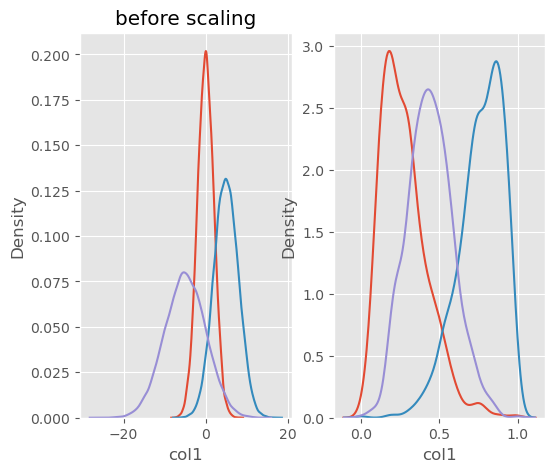

In [44]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('before scaling')
sns.kdeplot(df['col1'],ax=ax1)
sns.kdeplot(df['col2'],ax=ax1)
sns.kdeplot(df['col3'],ax=ax1)
sns.kdeplot(scaledfeatures['col1'],ax=ax2)
sns.kdeplot(scaledfeatures['col2'],ax=ax2)
sns.kdeplot(scaledfeatures['col3'],ax=ax2)
plt.show()

# #robust scaler 

In [50]:
df2 = pd.DataFrame({
    'col1':np.concatenate([np.random.normal(20,1,1000),
                          np.random.normal(1,1,25)]),
    'col2':np.concatenate([np.random.normal(30,1,1000),
                          np.random.normal(50,1,25)]),
})
df2

,col1,col2
0,19.317853,31.405852
1,19.743901,30.425827
2,19.703660,29.865862
3,18.337329,29.711474
4,19.533143,29.392233
...,...,...
1020,0.348920,49.654348
1021,0.291688,48.936155
1022,0.815950,49.591893
1023,-0.564219,49.728555


In [54]:
colnames=df2.columns
features = df2[colnames]
scaler=RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaledfeatures = pd.DataFrame(features, columns= colnames)
scaledfeatures.head()
scaledfeatures.describe()

,col1,col2
count,1025.000000,1025.000000
mean,-0.315030,0.304635
std,2.241856,2.201572
min,-14.844423,-2.068220
25%,-0.493342,-0.476624
50%,0.000000,0.000000
75%,0.506658,0.523376
max,2.409682,14.524370


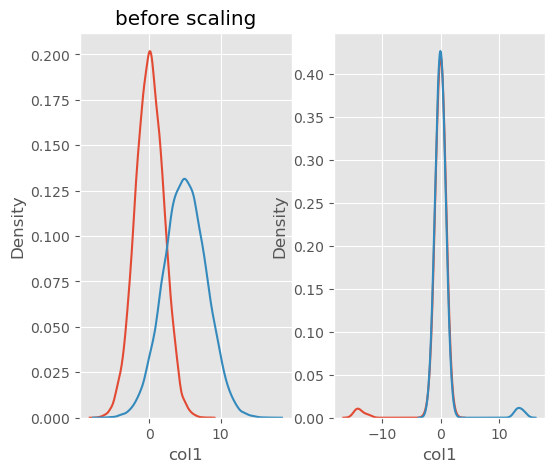

In [55]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('before scaling')
sns.kdeplot(df['col1'],ax=ax1)
sns.kdeplot(df['col2'],ax=ax1)

sns.kdeplot(scaledfeatures['col1'],ax=ax2)
sns.kdeplot(scaledfeatures['col2'],ax=ax2)

plt.show()